# Generate Simple Sinusoid

In [19]:
import numpy as np
import IPython.display as ipd

In [20]:
def sinusoid_generate(fs:int,dur:int,freq:int):
    sample_num:int = fs * dur #guess the answer
    sample_arange:list = np.arange(sample_num)
    sample_arange_time:list = sample_arange / fs #guess the answer
    return np.sin(2*np.pi*freq*sample_arange_time)

In [21]:
fs:int = 8000
dur:int = 2
freq:int = 440

x = sinusoid_generate(fs,dur,freq)
ipd.Audio(x, rate=fs)

Text(0.5, 0, 'sec')

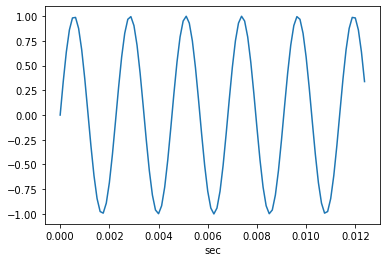

In [22]:
import matplotlib.pyplot as plt
plt.plot(np.arange(100)/fs,x[:100])
plt.xlabel('sec')

# Fast Fourier Transform

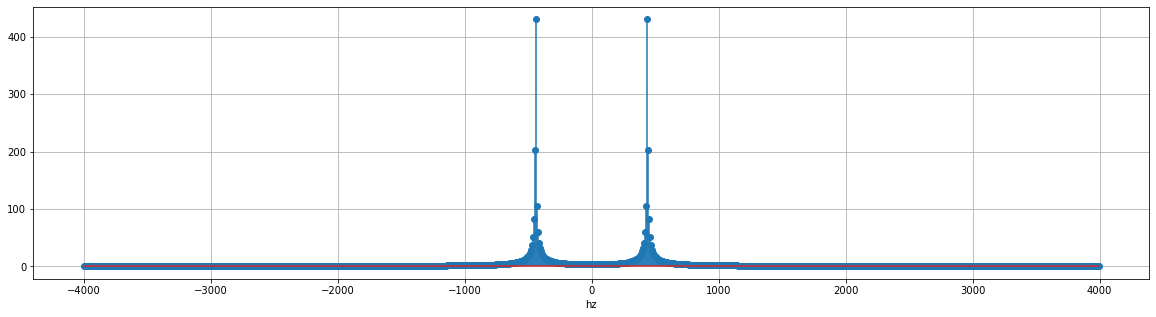

In [23]:
win_size = 1024
FFT_size = 1024

x_seg = x[:win_size]

X= np.fft.fft(x_seg)

X_mag = np.abs(X)
X_mag = np.fft.fftshift(X_mag)
X_phs = np.angle(X)

frequency_domain = np.fft.fftfreq(X_mag.shape[-1],1/fs)
frequency_domain = np.fft.fftshift(frequency_domain)

# plot_index_range = int((freq/(fs/FFT_size))) * 2
# plot_index_center = int(FFT_size/2) 
# plot linear scale
plt.figure(figsize=(20, 5))
plt.stem(frequency_domain, X_mag)
plt.xlabel('hz')
plt.grid(True)

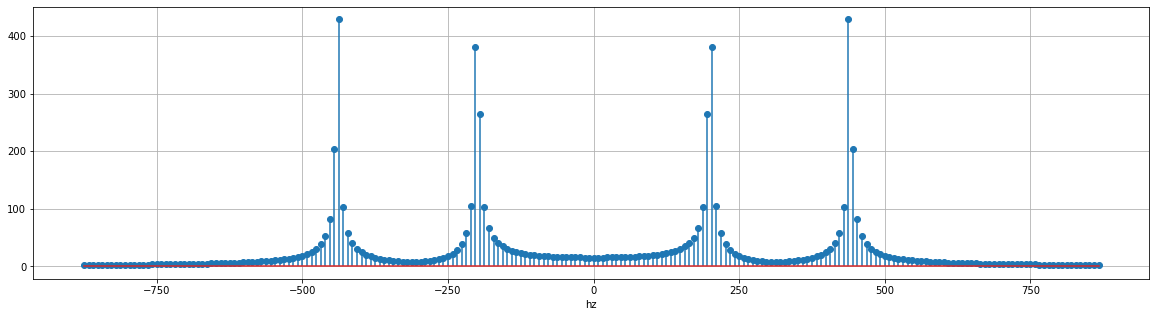

In [24]:
# Let's add another sinusoid
x2 = sinusoid_generate(fs,dur,200)

x = x + x2
x_seg = x[:win_size]

X= np.fft.fft(x_seg)

X_mag = np.abs(X)
X_mag = np.fft.fftshift(X_mag)
X_phs = np.angle(X)

frequency_domain = np.fft.fftfreq(X_mag.shape[-1],1/fs)
frequency_domain = np.fft.fftshift(frequency_domain)

plot_index_range = int((freq/(fs/FFT_size))) * 2
plot_index_center = int(FFT_size/2) 
# plot linear scale
plt.figure(figsize=(20, 5))
plt.stem(frequency_domain[plot_index_center - plot_index_range: plot_index_center + plot_index_range],X_mag[plot_index_center - plot_index_range: plot_index_center + plot_index_range])
plt.xlabel('hz')
plt.grid(True)

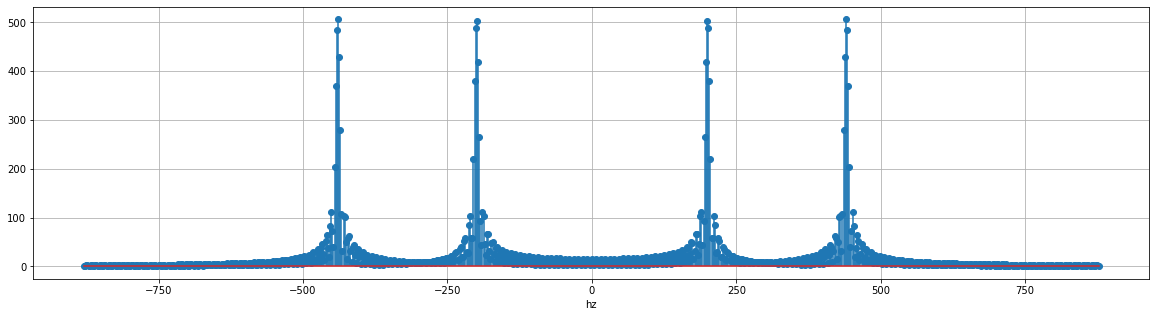

In [25]:
win_size = 1024
FFT_size = 1024 * 4

x_seg = x[:win_size]
x_seg = np.append(x_seg, np.zeros(FFT_size-win_size))

X= np.fft.fft(x_seg)

X_mag = np.abs(X)
X_mag = np.fft.fftshift(X_mag)
X_phs = np.angle(X)

frequency_domain = np.fft.fftfreq(X_mag.shape[-1],1/fs)
frequency_domain = np.fft.fftshift(frequency_domain)

plot_index_range = int((freq/(fs/FFT_size))) * 2
plot_index_center = int(FFT_size/2) 
# plot linear scale
plt.figure(figsize=(20, 5))
plt.stem(frequency_domain[plot_index_center - plot_index_range: plot_index_center + plot_index_range],X_mag[plot_index_center - plot_index_range: plot_index_center + plot_index_range])
plt.xlabel('hz')
plt.grid(True)

# Windowing

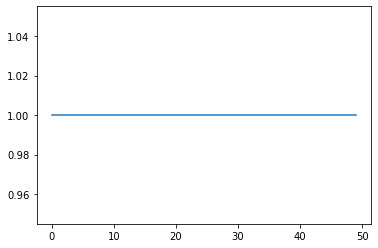

In [26]:
rec_window = np.ones(50)
plt.plot(rec_window)

<ipython-input-27-e64d68c33877>:4: RuntimeWarning: divide by zero encountered in log10
  W = 20 * np.log10(W)


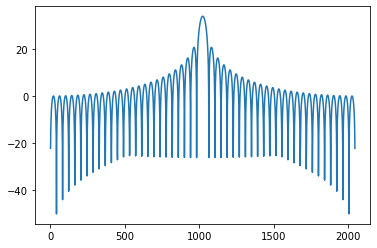

In [27]:
W = np.fft.fft(rec_window,2048)
W = np.fft.fftshift(W)
W = np.abs(W)
W = 20 * np.log10(W)
plt.plot(W)

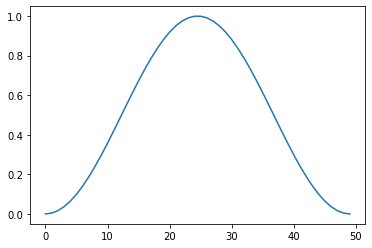

In [28]:
hann_window = np.hanning(50)
plt.plot(hann_window)

<ipython-input-29-47c0efb34c08>:4: RuntimeWarning: divide by zero encountered in log10
  W = 20 * np.log10(W)


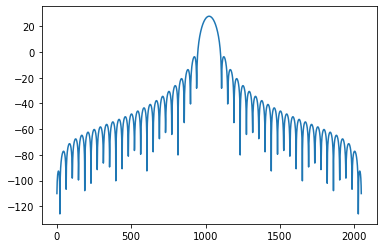

In [29]:
W = np.fft.fft(hann_window,2048)
W = np.fft.fftshift(W)
W = np.abs(W)
W = 20 * np.log10(W)
plt.plot(W)

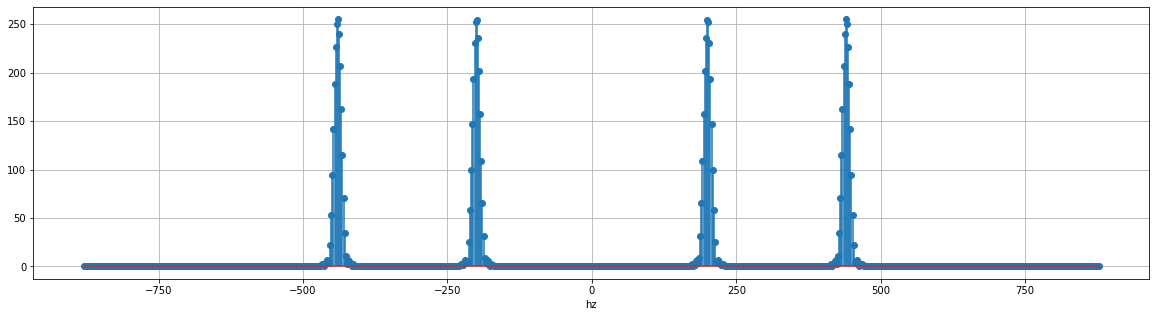

In [30]:
win_size = 1024
FFT_size = 1024 * 4

x_seg = x[:win_size] * np.hanning(win_size)
x_seg = np.append(x_seg, np.zeros(FFT_size-win_size))

X= np.fft.fft(x_seg)

X_mag = np.abs(X)
X_mag = np.fft.fftshift(X_mag)
X_phs = np.angle(X)

frequency_domain = np.fft.fftfreq(X_mag.shape[-1],1/fs)
frequency_domain = np.fft.fftshift(frequency_domain)

plot_index_range = int((freq/(fs/FFT_size))) * 2
plot_index_center = int(FFT_size/2) 
# plot linear scale
plt.figure(figsize=(20, 5))
plt.stem(frequency_domain[plot_index_center - plot_index_range: plot_index_center + plot_index_range],X_mag[plot_index_center - plot_index_range: plot_index_center + plot_index_range])
plt.xlabel('hz')
plt.grid(True)

# Short-time Fourier transform

In [13]:
import librosa
import librosa.display

In [14]:
audio,fs = librosa.load("./example.wav")
ipd.Audio(audio, rate=fs)

/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


FileNotFoundError: [Errno 2] No such file or directory: './example.wav'

In [31]:
n_fft = 256
hop_length = 128

STFT = librosa.stft(audio, window='hann', n_fft=n_fft, hop_length=hop_length)
STFT_DB = librosa.amplitude_to_db(np.abs(STFT), ref=np.max)

plt.figure(figsize=(10, 5))
img = librosa.display.specshow(STFT_DB, y_axis='linear', x_axis='time', hop_length=hop_length, sr=fs)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency spectrogram')

NameError: name 'audio' is not defined

In [32]:
# Let's see how spectrogram looks like when n_fft and hop size is changed
n_fft = 1024 
hop_length = 256 

STFT = librosa.stft(audio, window='hann', n_fft=n_fft, hop_length=hop_length)
STFT_DB = librosa.amplitude_to_db(np.abs(STFT), ref=np.max)

plt.figure(figsize=(10, 5))
img = librosa.display.specshow(STFT_DB, y_axis='linear', x_axis='time', hop_length=hop_length, sr=fs)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency spectrogram')

NameError: name 'audio' is not defined